In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn 

In [ ]:
dataset=pd.read_csv('../datasets/students_simple.csv')
N=23
N1=N%5
N2=(N*N)%5+5
col1=dataset.iloc[:,N1]
col2=dataset.iloc[:,N2]
print(f'Первый столбец таблицы: {dataset.columns[N1]}')
print(f'Второй столбец таблицы: {dataset.columns[N2]}')
print(f'Размеры датасета: {dataset.shape}')

0      95
1     115
2     111
3      97
4     105
5      98
6     109
7     120
8     122
9      92
10    110
11    102
12    108
13    100
14    104
15    104
16    128
17    106
18    105
19    117
Name: iq, dtype: int64
0      8.5
1      6.2
2      6.8
3     12.0
4      7.5
5     10.0
6      7.2
7      4.2
8      3.5
9      9.5
10     7.8
11     8.0
12     6.0
13     4.8
14     8.6
15    10.0
16     4.5
17    12.5
18    10.5
19     6.5
Name: test_time, dtype: float64
Index(['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp',
       'friends', 'test_time'],
      dtype='object')
(20, 10)


In [3]:
mean1=np.mean(col1)
mean2=np.mean(col2)
col1_fehner=col1>mean1
col2_fehner=col2>mean2
fehner=col1_fehner^col2_fehner
num_diff=fehner.sum()
num_eq=col1.shape[0]-num_diff
coef_fehner=(num_eq-num_diff)/(col1.shape[0])
print(f"Число с различным отклонением: {num_diff}")
print(f"Число с одинаковым отклонением: {num_eq}")
print(f"Коэффициент Фехнера: {coef_fehner}")

Число с различным отклонением: 17
Число с одинаковым отклонением: 3
Коэффициент Фехнера: -0.7


Сильная отрицательная связь

In [4]:
col1_zeromean=col1-mean1
col2_zeromean=col2-mean2
coef_pearson=((col1_zeromean*col2_zeromean).sum())/(np.sqrt((col1_zeromean**2).sum()*(col2_zeromean**2).sum()))
print(f"Коэффицент Пирсона: {coef_pearson}")
z=(np.log((1+coef_pearson)/(1-coef_pearson)))/2
SE=1/(np.sqrt(col1.shape[0]-3))
z_lower=z-1.96*SE
z_upper=z+1.96*SE
r_lower=(np.exp(2*z_lower)-1)/(np.exp(2*z_lower)+1)
r_upper=(np.exp(2*z_upper)-1)/(np.exp(2*z_upper)+1)
print(f'Доверительный интервал: [{r_lower},{r_upper}]')

Коэффицент Пирсона: -0.6818137442428809
Доверительный интервал: [-0.8637343054217906,-0.3426798212892742]


Линейная связь умеренная отрицательная.


In [21]:
values_col1,times_col1=np.unique(col1,return_counts=True)
ranks_col1=np.zeros(values_col1.shape)
rank=1
Tx=0
Ty=0
for i in range(values_col1.shape[0]):
    ranks_col1[i]=(2*rank+times_col1[i]-1)/2.0
    rank+=times_col1[i]
    Tx+=times_col1[i]**3-times_col1[i]
col1_ranking=np.zeros(col1.shape)
for i in range(values_col1.shape[0]):
    indicies=np.where(col1==values_col1[i])[0]
    col1_ranking[indicies]=ranks_col1[i]
values_col2,times_col2=np.unique(col2,return_counts=True)
ranks_col2=np.zeros(values_col2.shape)
rank=1
for i in range(values_col2.shape[0]):
    ranks_col2[i]=(2*rank+times_col2[i]-1)/2.0
    rank+=times_col2[i]
    Ty+=times_col2[i]**3-times_col2[i]
col2_ranking=np.zeros(col1.shape)
for i in range(values_col2.shape[0]):
    indicies=np.where(col2==values_col2[i])[0]
    col2_ranking[indicies]=ranks_col2[i]
Tx/=12
Ty/=12
temp=(col1.shape[0]**3-col1.shape[0])/6
coef_spearman=((temp-((col2_ranking-col1_ranking)**2).sum()-Tx-Ty))/(np.sqrt((temp-2*Tx)*(temp-2*Ty)))
print(f'Коэффициент Спирмена: {coef_spearman}')

Коэффициент Спирмена: -0.6823485616883068


Умеренная отрицательная монотонная зависимость

In [6]:
Nc=0
Nd=0
Tx=0
Ty=0
t=0
for i in range(col1.shape[0]):
    for j in range(i):
        if ((col1[i]-col1[j])*(col2[i]-col2[j])>0):
            Nc+=1
        elif ((col1[i]-col1[j])*(col2[i]-col2[j])<0):
            Nd+=1
        elif (col1[i]==col1[j]):
            Tx+=1
            if (col2[i]==col2[j]):
                Ty+=1
        else:
            Ty+=1
N_total=col1.shape[0]*(col1.shape[0]-1)/2
coef_Candle=(Nc-Nd)/(math.sqrt((N_total-Tx)*(N_total-Ty)))
print(f'Коэффициент Кенделла: {coef_Candle}')

Коэффициент Кенделла: -0.503980552812724


Средняя монотонная отрицательная зависимость

Коэффициенты показывают на то, что вероятно наши данные имеют линейнею отрицательную зависимость.

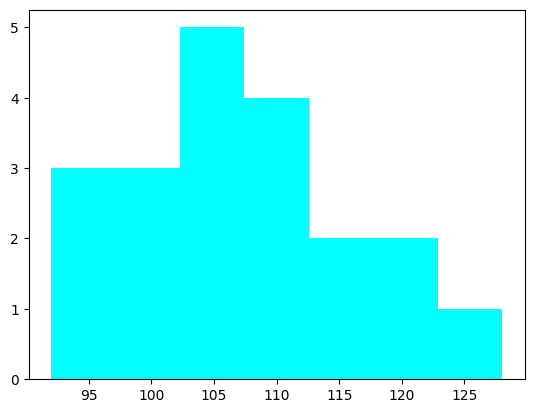

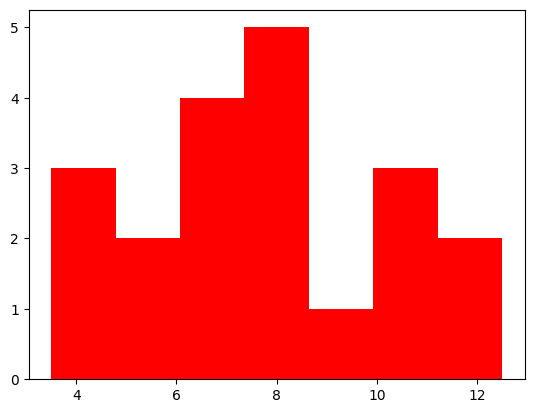

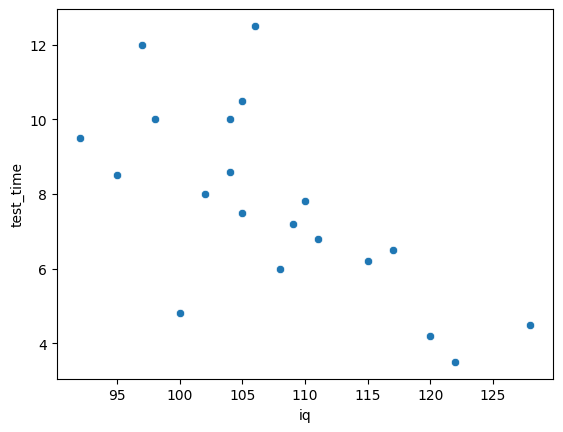

In [15]:
plt.hist(col1,bins=7,color="aqua")
plt.show()
plt.hist(col2,bins=7,color="red") 
plt.show()
seaborn.scatterplot(x=dataset.columns[N1],y=dataset.columns[N2],data=dataset)
plt.show()

Данные не имеют нормально распределения. Наблюдается чёткая отрицательная зависимость, с ростом IQ уменьшается время необходимое на тест, невероятно.

Коэффициент w1: -0.1831106870229008
Коэффициент w0: 27.396087786259546


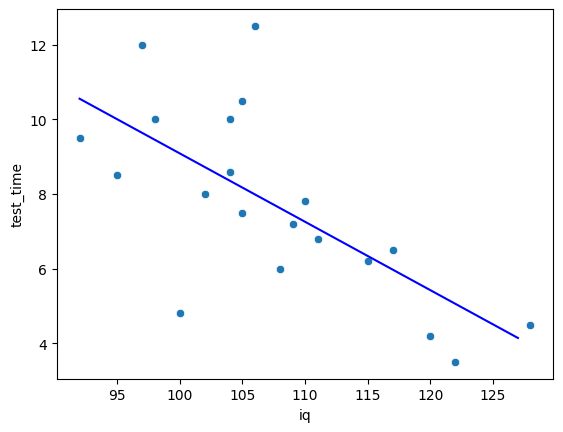

In [8]:
w1_linear=((col1_zeromean*col2_zeromean).sum())/((col1_zeromean**2).sum()) #тяжко считаемые производные
w0_linear=mean2-w1_linear*mean1
seaborn.scatterplot(x=dataset.columns[N1],y=dataset.columns[N2],data=dataset)
x=np.arange(col1.min(),col1.max())
plt.plot(x,w1_linear*x+w0_linear,color='blue',label='Equation')
print(f'Коэффициент w1: {w1_linear}')
print(f'Коэффициент w0: {w0_linear}')
plt.show()

Коэффициент w2: -0.0032998604634418105
Коэффициент w1: 0.5395941775914387
Коэффициент w0: -11.882655892786605


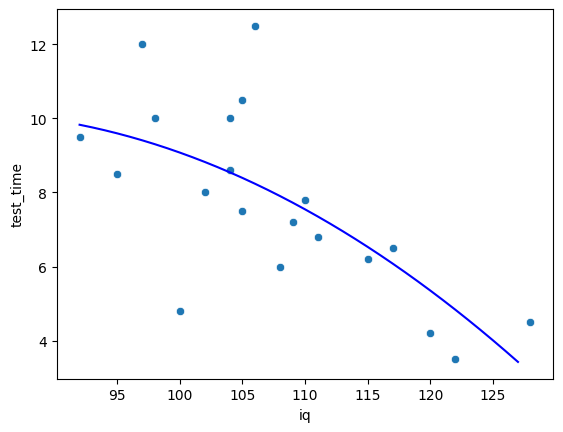

In [9]:
X=np.hstack([np.ones((col1.shape[0],1)),col1.to_numpy().reshape((-1,1)),(col1.to_numpy()**2).reshape((-1,1))])
beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,col2))
seaborn.scatterplot(x=dataset.columns[N1],y=dataset.columns[N2],data=dataset)
plt.plot(x,beta[0]+beta[1]*x+beta[2]*x**2,color='blue',label='Equation')
print(f'Коэффициент w2: {beta[2]}')
print(f'Коэффициент w1: {beta[1]}')
print(f'Коэффициент w0: {beta[0]}')
plt.show()

Коэффициент w1: 2091.874045995139
Коэффициент w0: -11.885944079668093


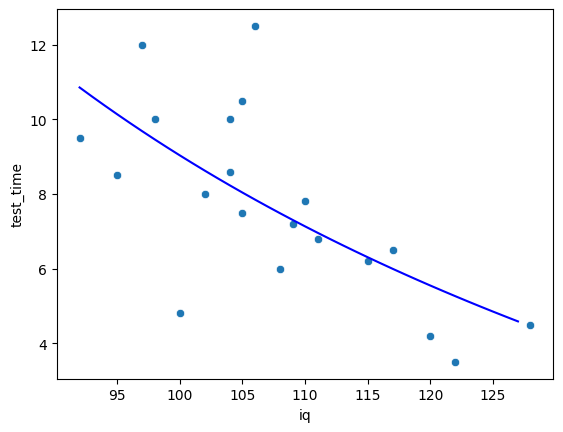

In [ ]:
hyper_col1=1/col1
hyper_col1_zeromean=hyper_col1-np.mean(hyper_col1)
w1_hyper_linear=((hyper_col1_zeromean*col2_zeromean).sum())/((hyper_col1_zeromean**2).sum())
w0_hyper_linear=mean2-w1_hyper_linear*np.mean(hyper_col1)
seaborn.scatterplot(x=dataset.columns[N1],y=dataset.columns[N2],data=dataset)
plt.plot(x,w1_hyper_linear/x+w0_hyper_linear,color='blue',label='Equation')
print(f'Коэффициент w1: {w1_hyper_linear}')
print(f'Коэффициент w0: {w0_hyper_linear}')
plt.show()

Коэффициент w0: 130.8013618684802
Коэффициент w1: 0.9735066346535938


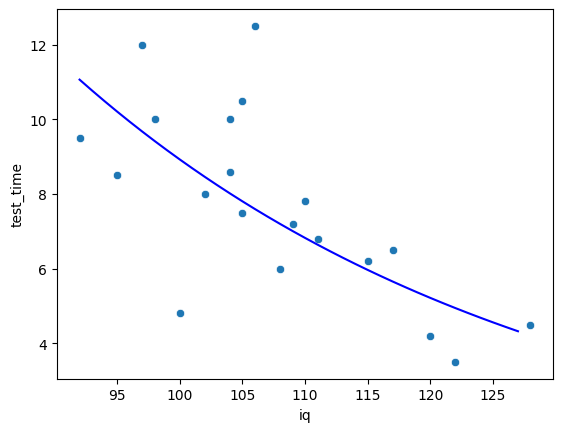

In [11]:
log_col2=np.log(col2)
log_col2_zeromean=log_col2-np.mean(log_col2)
w1_log_linear=((col1_zeromean*log_col2_zeromean).sum())/((col1_zeromean**2).sum()) #тяжко считаемые производные
w0_log_linear=np.mean(log_col2)-w1_log_linear*np.mean(col1)
w1_exp=np.exp(w1_log_linear)
w0_exp=np.exp(w0_log_linear)
seaborn.scatterplot(x=dataset.columns[N1],y=dataset.columns[N2],data=dataset)
plt.plot(x,w1_exp**x*w0_exp,color='blue',label='Equation')
print(f'Коэффициент w0: {w0_exp}')
print(f'Коэффициент w1: {w1_exp}')
plt.show()

Данные имеют явную отрицательную зависимость. Все 4 модели выдали близкие результаты, но наиболее хорошей выглядит экспоненциальная модель. Наиболее плохо выглядит квадратичная модель.

In [22]:
model_lin=col1*w1_linear+w0_linear
SSR=((model_lin-mean2)**2).sum()
SSE=((model_lin-col2)**2).sum()
k=1
coef_lin_fisher=(SSR/k)/(SSE/(col1.shape[0]-k-1))
print(f'Коэффициент Фишера для линейной модели: {coef_lin_fisher}')
model_sqr=beta[0]+beta[1]*col1+beta[2]*(col1**2)
SSR=((model_sqr-mean2)**2).sum()
SSE=((model_sqr-col2)**2).sum()
k=2
coef_sqr_fisher=(SSR/k)/(SSE/(col1.shape[0]-k-1))
print(f'Коэффициент Фишера для квадратичной модели: {coef_sqr_fisher}')
model_hyper=w0_hyper_linear+w1_hyper_linear/col1
SSR=((model_hyper-mean2)**2).sum()
SSE=((model_hyper-col2)**2).sum()
k=1
coef_hyper_fisher=(SSR/k)/(SSE/(col1.shape[0]-k-1))
print(f'Коэффициент Фишера для гиперболическлй модели: {coef_hyper_fisher}')
model_exp=w0_exp*(w1_exp**col1)
SSR=((model_exp-mean2)**2).sum()
SSE=((model_exp-col2)**2).sum()
k=1
coef_exp_fisher=(SSR/k)/(SSE/(col1.shape[0]-k-1))
print(f'Коэффициент Фишера для экспоненциальной модели: {coef_exp_fisher}')

Коэффициент Фишера для линейной модели: 15.63668527106914
Коэффициент Фишера для квадратичной модели: 7.9257725031131185
Коэффициент Фишера для гиперболическлй модели: 14.198745540558738
Коэффициент Фишера для экспоненциальной модели: 16.023721823578096


Самая лучшая из представленных моделей экспоненциальная, со значением гораздо лучше среднего значения.